<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
!pip install factor_analyzer

In [4]:
data_red = pd.read_csv('winequality-red(1).csv', delimiter=";")
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
fa = FactorAnalyzer(n_factors=2, rotation=None)

data_red_dropped = data_red.drop(columns=['quality'])
X = StandardScaler().fit_transform(data_red_dropped)
# Fit the factor analysis model
fa.fit(X)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=2, rotation=None, rotation_kwargs={},
            use_smc=True)


# Get factor loadings, eigenvalues, etc.
loadings = fa.loadings_

eigenvalues, _ = fa.get_eigenvalues()

loadings_df = pd.DataFrame(loadings,
                           index=data_red_dropped.columns,   # Set the row index to be the feature names
                           columns=["Factor 1", "Factor 2"])  # Name factors

# Display the DataFrame of factor loadings
print(loadings_df)



                      Factor 1  Factor 2
fixed acidity         0.896497 -0.135213
volatile acidity     -0.337564  0.138369
citric acid           0.772231 -0.067991
residual sugar        0.194217  0.251718
chlorides             0.272510  0.111717
free sulfur dioxide  -0.077123  0.676341
total sulfur dioxide  0.019273  0.885868
density               0.612407  0.181412
pH                   -0.707746 -0.023812
sulphates             0.319989  0.029865
alcohol              -0.146513 -0.264006


<Axes: >

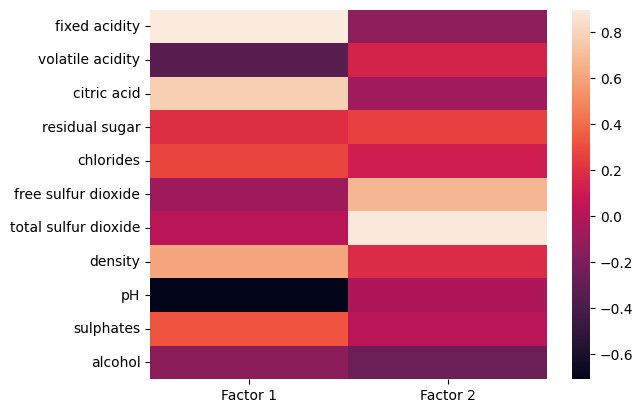

In [12]:
sns.heatmap(loadings_df)


In [13]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
communalities = loadings ** 2  # Square the factor loadings
communalities = communalities.sum(axis=1)  # Sum the squared loadings across factors (row-wise sum)

# Convert communalities into a DataFrame (optional for better readability)
communalities_df = pd.DataFrame(communalities, index=data_red_dropped.columns, columns=['Communality'])

communalities_df

,Communality
fixed acidity,0.821989
volatile acidity,0.133096
citric acid,0.600964
residual sugar,0.101082
chlorides,0.086743
free sulfur dioxide,0.463386
total sulfur dioxide,0.785133
density,0.407953
pH,0.501471
sulphates,0.103285


In [16]:
uniqueness = fa.get_uniquenesses()

# Get the factor loadings (this is the lambda matrix)
lambda_ = fa.loadings_

# Construct the psi (diagonal matrix of uniquenesses)
psi = np.diag(uniqueness)

# Get the correlation matrix (s)
s = np.corrcoef(np.transpose(data_red_dropped))

# Calculate the sigma matrix: sigma = lambda_.T * lambda_ + psi
# Since lambda_ is (n_variables, n_factors), we need to calculate lambda_ @ lambda_.T
sigma = np.matmul(lambda_, lambda_.T) + psi

# Calculate residuals: residuals = s - sigma
residuals = s - sigma

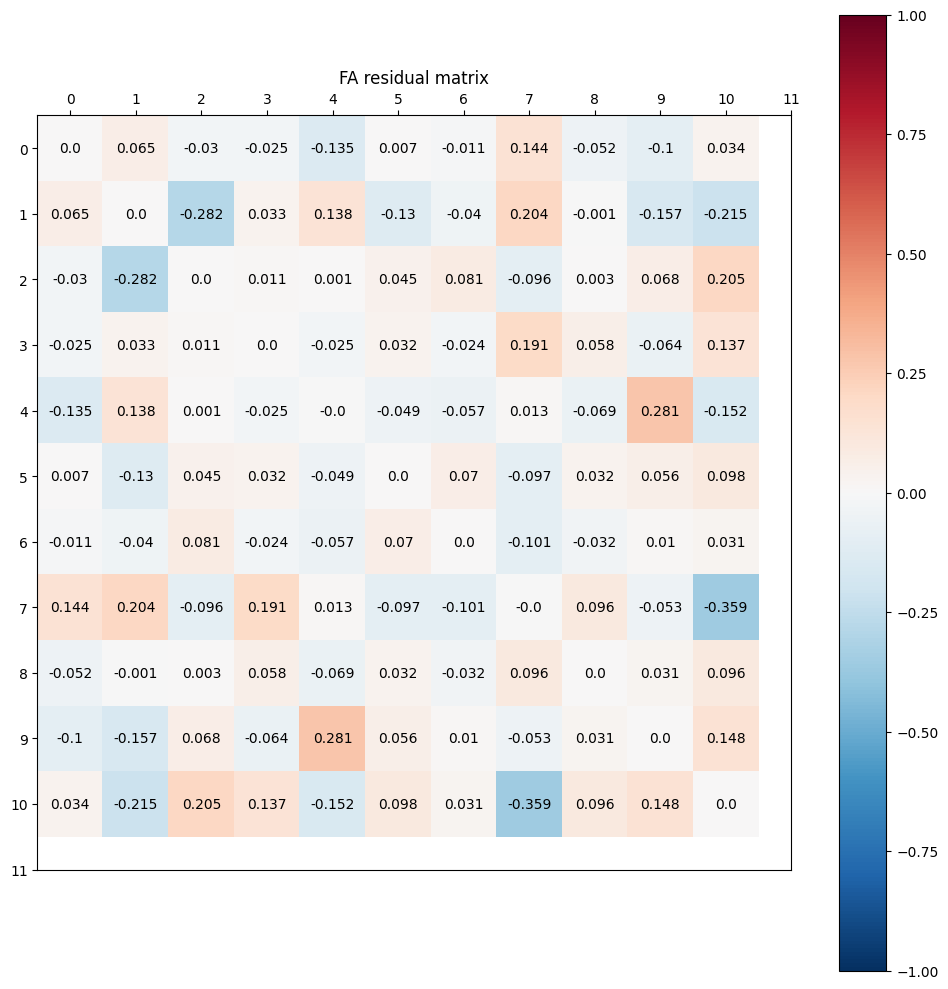

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_yticks(range(12))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

In [18]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_red, 2)
res_w = mod_w.fit()
res_w.rotate('quartimax')


In [47]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_red_dropped, 3)
res_w = mod_w.fit()
res_w.rotate('quartimax')
res_w.summary()
res_w.get_loadings_frame(threshold=0.5)

,factor 0,factor 1,factor 2
citric acid,-0.926798,0.028969,0.024422
fixed acidity,-0.737782,-0.167319,0.437489
pH,0.593720,-0.002028,-0.324361
volatile acidity,0.566464,0.004739,0.291855
sulphates,-0.369404,0.083796,-0.015284
total sulfur dioxide,0.019182,0.862538,0.100180
free sulfur dioxide,0.051141,0.774920,-0.052102
residual sugar,-0.129520,0.223685,0.180231
density,-0.351621,0.039880,0.834004
alcohol,-0.130552,-0.132142,-0.605221


Three factors can be described as roughness, roughness and viscosity.

In [30]:
res_w.get_loadings_frame(threshold=0.4)

,factor 0,factor 1
fixed acidity,-0.900843,-0.102345
citric acid,-0.774198,-0.039717
pH,0.706402,-0.049672
density,-0.605367,0.203696
volatile acidity,0.342397,0.125942
sulphates,-0.318682,0.041544
chlorides,-0.268243,0.121613
total sulfur dioxide,0.013129,0.885913
free sulfur dioxide,0.101803,0.673099
alcohol,0.136763,-0.269198


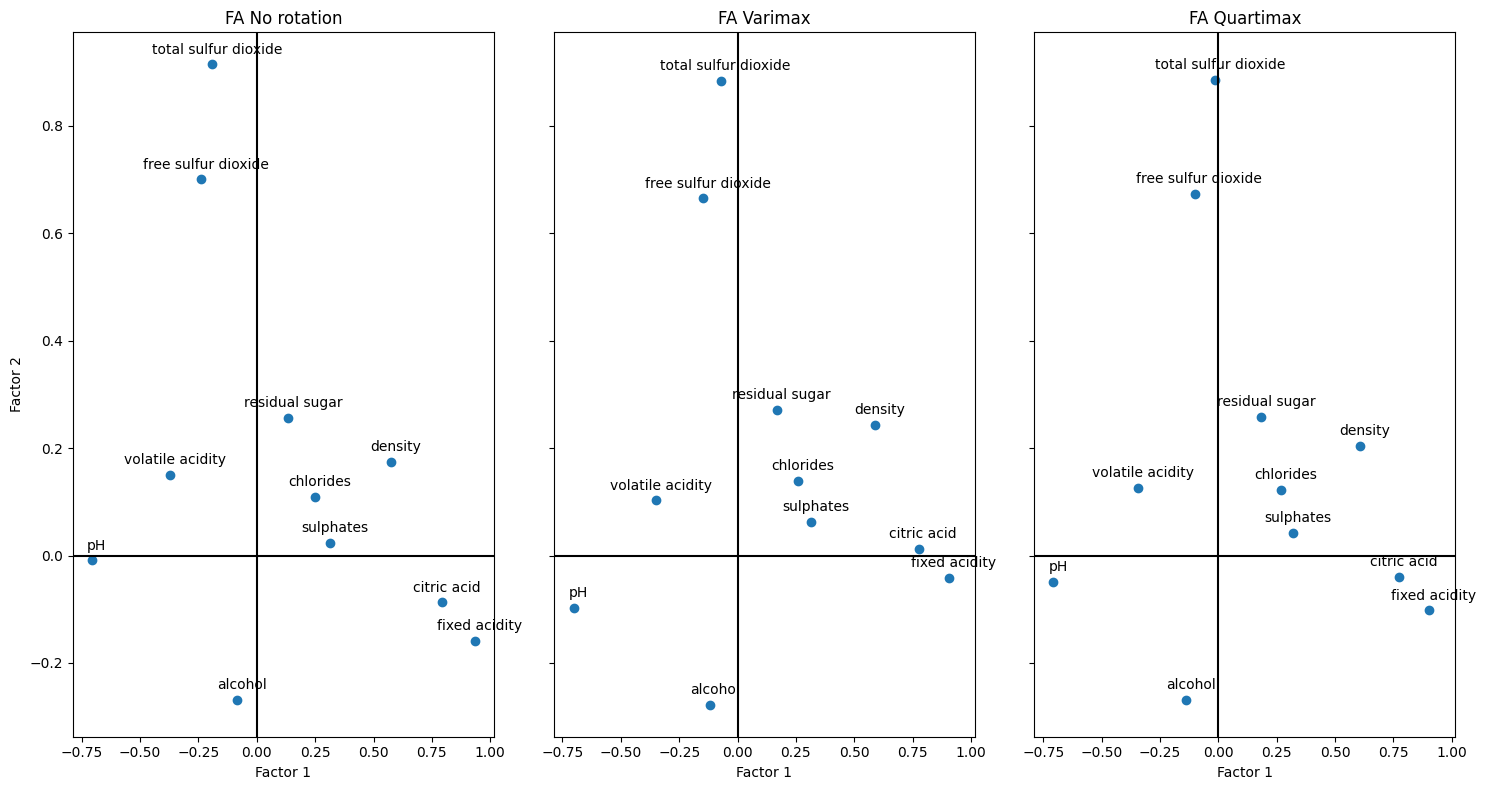

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Standardize the data (assuming data_white is your dataset)


# Define different factor analysis methods with rotations
methods = [
    ("FA No rotation", FactorAnalyzer(2)),
    ("FA Varimax", FactorAnalyzer(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(2, rotation="quartimax")),
]

# Create subplots with shared x and y axes
fig, axes = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)

for ax, (method_name, fa) in zip(axes, methods):
    # Fit the FactorAnalyzer model
    fa.fit(X)

    # Get the factor loadings (not components)
    loadings = fa.loadings_

    # Plot scatter of factor loadings for Factor 1 and Factor 2
    ax.scatter(loadings[:, 0], loadings[:, 1])

    # Draw lines for x=0 and y=0
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

    # Annotate the points with variable names
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_red.columns[i], ha="center")

    # Set the title for each subplot
    ax.set_title(method_name)

    # Set labels
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 2")
    ax.set_xlabel("Factor 1")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()